<a href="https://colab.research.google.com/github/jsscmaina/machinelearning4102/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

In [41]:
from google.colab import files
upload = files.upload()

Saving train_data.csv to train_data (1).csv


In [0]:
data = pd.read_csv('train_data.csv')

In [0]:
#droping missing values
#data.dropna(subset=['Alley','FireplaceQu'],inplace=True)
#data.dropna(axis=1,inplace=True)

#replacing missing values with zero so that numeric data still have float or int datatype
data.fillna(0, inplace=True)
data.info()

In [0]:
nominal=['Street','Alley','Utilities','LotConfig','Neighborhood','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
         'Heating','Electrical','GarageType','GarageFinish','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','ExterQual',
         'ExterCond','BsmtCond','KitchenQual','FireplaceQu','GarageQual','GarageCond']
ordinal=['MSZoning','LotShape','LandContour','LandSlope','Condition1','Condition2','BldgType','HouseStyle','BsmtQual','BsmtExposure',
         'BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Functional']
target=['SalePrice']
numerical=['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
           'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
           'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
           'PoolArea','MiscVal','MoSold','YrSold']

categorical_data = data.select_dtypes(include=['object']).copy()
column_names = list(categorical_data.columns)
#categorical_data
column_names
for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')
for feature in ordinal:
      categorical_data[feature]=categorical_data[feature].cat.codes
categorical_data.head(20)

In [45]:
data_copy = categorical_data.copy()

data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy],axis=1)
data_copy.drop(nominal,axis=1,inplace=True)
#data_copy
new_data = pd.concat([data_copy,data[numerical],data[target]],axis=1)
new_data

,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,...,BsmtFinType2,HeatingQC,CentralAir,Functional,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,6,0,1,6,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,6,0,1,6,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,6,0,1,6,68.0,11250,7,5,2002,2001,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,6,2,1,6,60.0,9550,7,5,1970,1915,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,6,0,1,6,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,6,0,1,6,62.0,7917,6,5,2000,1999,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,5,4,1,2,85.0,13175,6,6,1988,1978,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,6,0,1,6,66.0,9042,7,9,2006,1941,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,2,1,6,68.0,9717,5,6,1996,1950,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [0]:
all_features = list(new_data.columns)
all_features
X = new_data.loc[:,all_features].values
Y = new_data.loc[:,["SalePrice"]].values
X

In [47]:
X = StandardScaler().fit_transform(X)
X

array([[-0.06423821,  0.06423821,  0.25782141, ..., -1.5991111 ,
         0.13877749,  0.34727322],
       [-0.06423821,  0.06423821,  0.25782141, ..., -0.48911005,
        -0.61443862,  0.00728832],
       [-0.06423821,  0.06423821,  0.25782141, ...,  0.99089135,
         0.13877749,  0.53615372],
       ...,
       [-0.06423821,  0.06423821,  0.25782141, ..., -0.48911005,
         1.64520971,  1.07761115],
       [-0.06423821,  0.06423821,  0.25782141, ..., -0.8591104 ,
         1.64520971, -0.48852299],
       [-0.06423821,  0.06423821,  0.25782141, ..., -0.1191097 ,
         0.13877749, -0.42084081]])

In [48]:
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2'])
#pca_data
final_data = pd.concat([pca_data,data[target]],axis=1)
final_data

,PC1,PC2,SalePrice
0,3.453935,0.783678,208500
1,-0.135610,-2.690855,181500
2,4.148527,0.433420,223500
3,-1.428249,-0.135578,140000
4,5.960018,0.452786,250000
...,...,...,...
1455,1.718411,0.425786,175000
1456,0.634846,-3.797643,210000
1457,1.285735,0.388601,266500
1458,-2.951659,-2.448523,142125


In [49]:
pca.explained_variance_ratio_

array([0.07274969, 0.03288557])

In [0]:
#creating new data set array
final_data_array = final_data.to_numpy()
final_data_array

In [0]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X,Y = np.meshgrid(np.linspace(min_val[0],max_val[0],20), np.linspace(min_val[1],max_val[1],20))

In [0]:
regressor=LassoCV()
final_train = np.c_[final_data_array[:,0],final_data_array[:,1]]
#np.c_[data[:,0], data[:,1]]
regressor.fit(final_train,final_data_array[:,2])
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
#linear regression equation 
Z=w_1*X + w_2*Y + b
Z

Text(0.5, 0.92, 'Plane of best Fit')

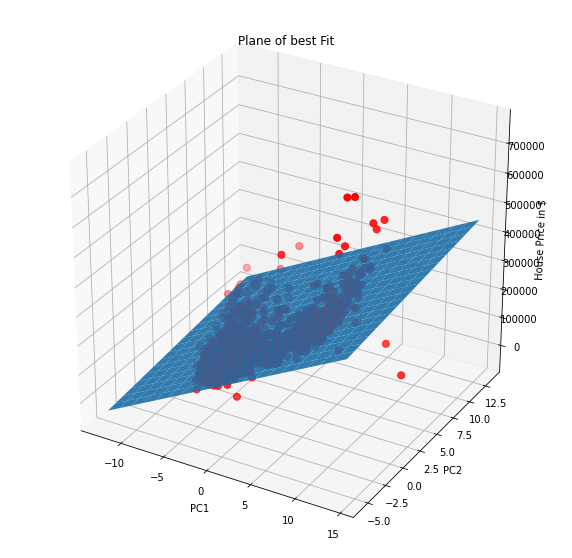

In [53]:
fig1 = plt.figure(figsize=(10,10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2],c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of best Fit")